In [84]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties import unumpy

In [93]:
from scipy.optimize import curve_fit

E = [86.5, 105.3, 122.1, 136.5, 344.5, 661.7, 723.3, 964.1, 1274.5, 1332.5, 1596.5]
sigma = [1.352, 1.399, 1.659, 1.661, 1.749, 2.203, 2.056, 2.248, 2.432, 2.635, 2.711]
FWHM = (2*np.sqrt(2*m.log(2)))*np.array(sigma)
FWHM_e = np.array(FWHM)*0.3631895412391691
print(FWHM_e) 

[1.15629261 1.19648917 1.41885313 1.42056363 1.49582527 1.88410696
 1.7583858  1.92259303 2.0799583  2.25357324 2.31857194]


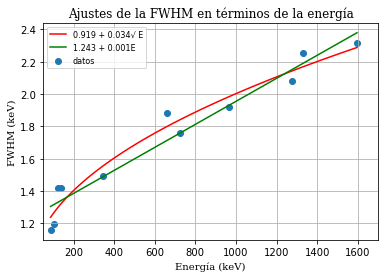

Parámetros ajustados:
f0 = 0.9189784834709183, delta_f0 = 0.06176084217935057
f1 = 0.034269627532427606, delta_f1 = 0.00238968002245691
l0 = 1.2432031760178472, delta_l0 = 0.04915481989908383
l1 = 0.0007118037640895466, delta_l1 = 5.760311380969986e-05


In [138]:
def FWHM(E, f0, f1):
    return f0 + f1*np.sqrt(E)

params, covariance = curve_fit(FWHM, E, FWHM_e)
f0, f1 = params
E_fit = np.linspace(min(E), max(E), 100)
FWHM_e_fit = FWHM(E_fit, f0, f1)
errors = np.sqrt(np.diag(covariance))

def FWHM1(E, l0, l1):
    return l0 + l1*E

params1, covariance1 = curve_fit(FWHM1, E, FWHM_e)
l0, l1 = params1
errors1 = np.sqrt(np.diag(covariance1))

E_fit = np.linspace(min(E), max(E), 100)
FWHM1_e_fit = FWHM1(E_fit, l0, l1)

plt.scatter(E, FWHM_e, label = "datos")
plt.plot(E_fit, FWHM_e_fit, color = "red", label = f"{f0:.3f} + {f1:.3f}\u221A E")
plt.plot(E_fit, FWHM1_e_fit, color = "green", label = f"{l0:.3f} + {l1:.3f}E" )
plt.xlabel("Energía (keV)", family = "serif")
plt.ylabel("FWHM (keV)", family = "serif")
plt.title("Ajustes de la FWHM en términos de la energía", family = "serif")
plt.legend(fontsize = 8)
plt.xlim(50, 1700)
plt.grid()
plt.show()
print(f"Parámetros ajustados:") 
print(f"f0 = {f0}, delta_f0 = {errors[0]}")
print(f"f1 = {f1}, delta_f1 = {errors[1]}")
print(f"l0 = {l0}, delta_l0 = {errors1[0]}")
print(f"l1 = {l1}, delta_l1 = {errors1[1]}")

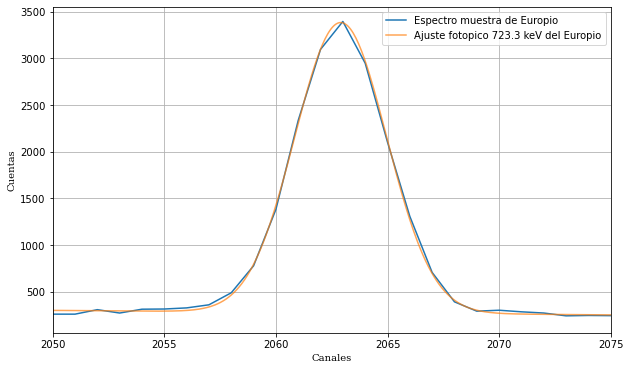

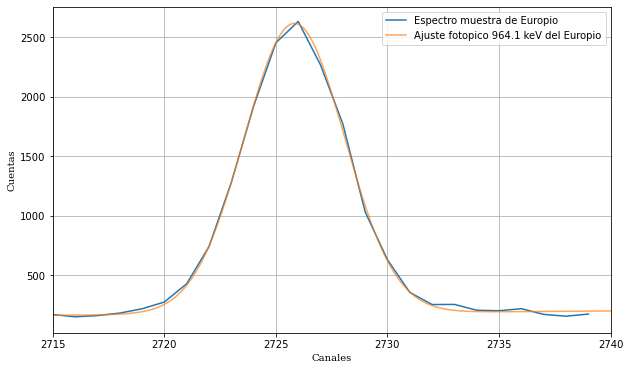

In [209]:
fig, ax = plt.subplots(figsize=(10, 6))
n = 3
x1, x2 = limites[n]
fit = ajuste1(europio, x1, x2)
ax.plot(europio.canales[x1:x2], europio.cuentas[x1:x2], label="Espectro muestra de Europio")
ax.plot(np.linspace(x1, x2, 500), fit.eval(x=np.linspace(x1, x2, 500)), alpha=0.7, label=f"Ajuste fotopico {energía[n]} keV del Europio")
ax.set_xlabel("Canales", family="serif")
ax.set_ylabel("Cuentas", family="serif")
ax.legend(fontsize=10, loc='upper right', bbox_to_anchor=(1, 1))
plt.xlim(2050, 2075)
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
n = 4
x1, x2 = limites[n]
fit = ajuste1(europio, x1, x2)
ax.plot(europio.canales[x1:x2], europio.cuentas[x1:x2], label="Espectro muestra de Europio")
ax.plot(np.linspace(x1, x2, 500), fit.eval(x=np.linspace(x1, x2, 500)), alpha=0.7, label=f"Ajuste fotopico {energía[n]} keV del Europio")
ax.set_xlabel("Canales", family="serif")
ax.set_ylabel("Cuentas", family="serif")
ax.legend(fontsize=10, loc='upper right', bbox_to_anchor=(1, 1))
plt.xlim(2715, 2740)
plt.grid()
plt.show()

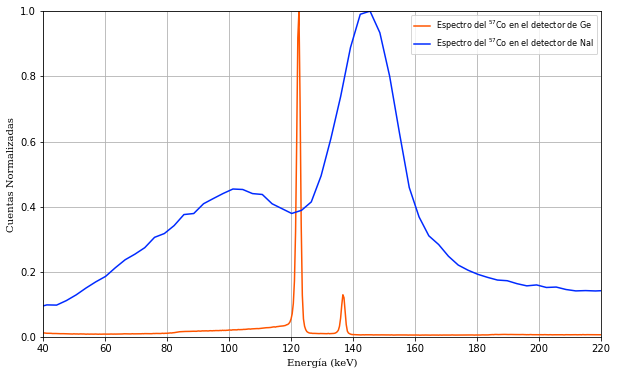

In [259]:
datos = "NaI_57Co_300s.dat"
df1 = pd.read_table(datos, sep="\s+")

a0 = -41
a1 = 3.16

x_energia = a0 + a1 * x2

x1=a.eval(x=muestras.canales)
y1=muestras.cuentas
x2 = df1["canal"]
y2 = df1["cuentas"]
y1_normalized = y1 / y1.max()
y2_normalized = y2 / y2.max()

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x1, y1_normalized, color="#FF5500", label="Espectro del $^{57}$Co en el detector de Ge")
plt.plot(x_energia, y2_normalized, color="#002AFF", label="Espectro del $^{57}$Co en el detector de NaI")
ax.set_xlabel("Energía (keV)", family="serif")
ax.set_ylabel("Cuentas Normalizadas", family="serif")
ax.set_xlim(40, 220)
ax.set_ylim(0, 1)  
ax.legend(fontsize=8)
plt.grid()
plt.show()